from https://www.kaggle.com/datasets/mazlumi/mbti-personality-type-twitter-dataset/code

In [1]:
import pandas as pd

In [26]:
df=pd.read_csv('twitter_MBTI.csv')
df.head()

,Unnamed: 0,text,label
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,1,@Hispanthicckk Being you makes you look cute||...,intj
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj


<AxesSubplot:>

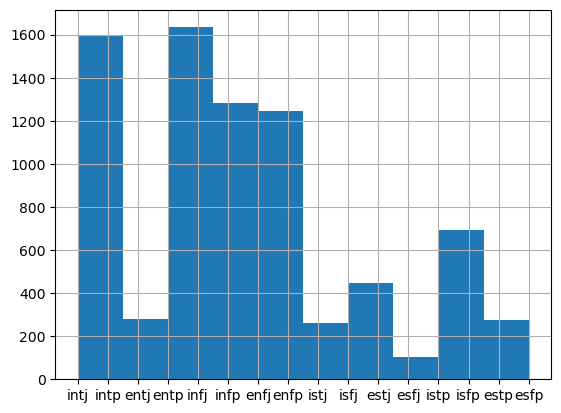

In [4]:
df.label.hist()

In [75]:
import re
re.sub('@[^\s]*','','xxx @yz zzz')

'xxx  zzz'

In [79]:
# nb each text contains multiple tweets seperated with ||| Was going to burst these, but don'tthink it adds value
# but definitely works removing @handles, and urls (probably)
import re
def rmhand(s):
    return re.sub('@[^\s]*','',s)
def rmurl(s):
    return re.sub('https://[^\s]*','',s)
def clean_tweets(s):
    s=s.apply( rmhand )
    s=s.apply(rmurl)
    return s
test=pd.Series(['xxx @yz zzz','start https://spug end'])
clean_tweets(test)

0      xxx  zzz
1    start  end
dtype: object

['intj' 'intp' 'entj' 'entp' 'infj' 'infp' 'enfj' 'enfp' 'istj' 'isfj'
 'estj' 'esfj' 'istp' 'isfp' 'estp' 'esfp']
intj (81, 3)
intp (161, 3)
entj (241, 3)
entp (321, 3)
infj (401, 3)
infp (481, 3)
enfj (561, 3)
enfp (641, 3)
istj (721, 3)
isfj (801, 3)
estj (881, 3)
esfj (961, 3)
istp (1041, 3)
isfp (1121, 3)
estp (1201, 3)
esfp (1281, 3)


<AxesSubplot:>

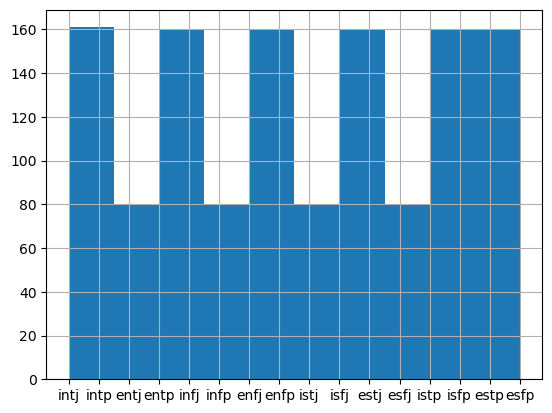

In [92]:
# get fully balanced sample
# firstly get labels
types=df.label.unique()
print(types)
# then get nsamp of each
nsamp=80
t='intj'
df.query('label=="'+t+'"')
working_df=df.head(1)
for t in types:    
    working_df=pd.concat([working_df,df.query('label=="'+t+'"').sample(nsamp)])
    print(t,working_df.shape)
# clean it
working_df.text=clean_tweets(working_df.text)
working_df.label.hist()  
    

In [93]:
# rename our data so I can copy paste mueller code
bards_words=working_df.text

In [94]:
# pp 35
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

In [95]:
vect.fit(working_df.text)
print(f"size {len(vect.vocabulary_)}")

size 77320


In [96]:
#print(f"content {vect.vocabulary_}")

In [97]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <1281x77320 sparse matrix of type '<class 'numpy.int64'>'
	with 668319 stored elements in Compressed Sparse Row format>


In [98]:
print("Dense representation of bag_of_words:\n{}".format(
    bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [99]:
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = working_df.text, working_df.label

In [100]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<1281x77320 sparse matrix of type '<class 'numpy.int64'>'
	with 668319 stored elements in Compressed Sparse Row format>


In [101]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 77320
First 20 features:
['00', '000', '0000', '000000', '00000000', '00000000000', '0000001', '0001', '0001891', '0002thinker', '000kg', '001', '007', '008', '00am', '00h', '00l', '00pm', '01', '010422']
Features 20010 to 20030:
['elle님은', 'ellie', 'ellieeeee', 'elliets', 'ellin', 'elliot', 'elliots', 'elliott', 'ello', 'ellos', 'elly', 'ellínikon', 'elm', 'elma', 'elmax', 'elmegy', 'elmo', 'elms', 'elo', 'elodie']
Every 2000th feature:
['00', 'abck', 'ambassador', 'augmenter', 'benicio', 'brighten', 'chali', 'confectionary', 'darned', 'dissapointing', 'elkövetkezendő', 'fakkkkkkk', 'front', 'golfer', 'harkens', 'hospitak', 'ink', 'jodel', 'kiri', 'lezzgoooooooo', 'maii', 'mianiversariodetwitter', 'myeong', 'nomination', 'oublié', 'petnames', 'prob', 'rectangles', 'rumahku', 'seriosuly', 'slipped', 'step', 'tally', 'tobacco', 'unconditional', 'wacha', 'wracking', 'älylliset', '덤벼_내_카드는_원어스']


/home/johnc/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [102]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=2)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

/home/johnc/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean cross-validation accuracy: 0.11


/home/johnc/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
